In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)
library(stringr)

# 3. 폰트 로드
loadfonts()


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R



# Step 1. Load data

In [2]:
df_ukb <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/obj2/prediction-X/X.tsv", 
    sep = '\t'
) %>% 
    filter(weight == 2) %>% 
    filter(lower_Vx > 1e-4)

df_ukb %>% head()

pheno,lambda,weight,Vx,lower_Vx,upper_Vx
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Weight,0.5875425,2,0.016740647,0.0032179860,0.03152318
Leg_predicted_mass__right_,0.6312283,2,0.019881996,0.0051861910,0.03411669
Waist_circumference,0.4744789,2,0.011998955,0.0027356576,0.02038155
Mean_corpuscular_haemoglobin_concentration,0.2502453,2,0.003078505,0.0006293484,0.00584596
Platelet_count,0.5854203,2,0.017821407,0.0072039409,0.02976127
LDL_direct,0.2791911,2,0.004078075,0.0001742080,0.00749304


In [3]:
df_gs <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/GS/obj2/prediction-X/X.tsv",
    sep = '\t'
) %>% 
    filter(weight == 2) %>% 
    filter(lower_Vx > 1e-4)

df_gs %>% head()

pheno,lambda,weight,Vx,lower_Vx,upper_Vx
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
avg_dia,0.2639843,2,0.007466360,0.003572011,0.010942965
avg_sys,0.2312438,2,0.004163088,0.001829972,0.006938271
PR_interval,0.3554416,2,0.014417415,0.010287446,0.019817258
Total_cholesterol,0.2815375,2,0.006192345,0.001787077,0.010084866
QRS_axis,0.1821874,2,0.008040747,0.006441520,0.009520353
max_arm,0.2787470,2,0.004097626,0.000561863,0.007550130


# plot theme

In [4]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),  
            
            # 축 설정
            axis.line.x.top = element_blank(),
            axis.line.y.right = element_blank(),
            axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(0, 0, 0, 0)
        )
}

# Step 2. Plot

In [5]:
df_mrg <- rbind(df_ukb %>% mutate(cohort = "UKB"), df_gs %>% mutate(cohort = "GS:SFHS"))

df_mrg %>% head()

pheno,lambda,weight,Vx,lower_Vx,upper_Vx,cohort
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Weight,0.5875425,2,0.016740647,0.0032179860,0.03152318,UKB
Leg_predicted_mass__right_,0.6312283,2,0.019881996,0.0051861910,0.03411669,UKB
Waist_circumference,0.4744789,2,0.011998955,0.0027356576,0.02038155,UKB
Mean_corpuscular_haemoglobin_concentration,0.2502453,2,0.003078505,0.0006293484,0.00584596,UKB
Platelet_count,0.5854203,2,0.017821407,0.0072039409,0.02976127,UKB
LDL_direct,0.2791911,2,0.004078075,0.0001742080,0.00749304,UKB


In [6]:
df_mrg %>% summary(mean(Vx))

    pheno               lambda           weight        Vx          
 Length:29          Min.   :0.1822   Min.   :2   Min.   :0.003079  
 Class :character   1st Qu.:0.2792   1st Qu.:2   1st Qu.:0.006192  
 Mode  :character   Median :0.4362   Median :2   Median :0.011999  
                    Mean   :0.4322   Mean   :2   Mean   :0.011064  
                    3rd Qu.:0.5854   3rd Qu.:2   3rd Qu.:0.015820  
                    Max.   :0.6564   Max.   :2   Max.   :0.019882  
    lower_Vx            upper_Vx           cohort         
 Min.   :0.0001742   Min.   :0.005846   Length:29         
 1st Qu.:0.0013962   1st Qu.:0.009520   Class :character  
 Median :0.0025483   Median :0.019817   Mode  :character  
 Mean   :0.0033758   Mean   :0.019003                     
 3rd Qu.:0.0051862   3rd Qu.:0.028487                     
 Max.   :0.0102874   Max.   :0.034117                     

In [7]:
df_mrg %>% arrange(cohort, desc(Vx))

pheno,lambda,weight,Vx,lower_Vx,upper_Vx,cohort
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
PR_interval,0.3554416,2,0.014417415,0.0102874463,0.019817258,GS:SFHS
P_axis,0.2232661,2,0.010148398,0.0082937269,0.012491165,GS:SFHS
QRS_axis,0.1821874,2,0.008040747,0.0064415195,0.009520353,GS:SFHS
avg_dia,0.2639843,2,0.007466360,0.0035720112,0.010942965,GS:SFHS
Total_cholesterol,0.2815375,2,0.006192345,0.0017870774,0.010084866,GS:SFHS
avg_sys,0.2312438,2,0.004163088,0.0018299724,0.006938271,GS:SFHS
max_arm,0.2787470,2,0.004097626,0.0005618630,0.007550130,GS:SFHS
Leg_predicted_mass__right_,0.6312283,2,0.019881996,0.0051861910,0.034116688,UKB
Mean_platelet__thrombocyte__volume,0.6563898,2,0.018939161,0.0033732609,0.031185701,UKB


In [41]:
library(stringr)
# phenotype 이름 정리를 위한 함수
clean_pheno_names <- function(x) {
    x %>%
        # 기본적인 치환 규칙
        str_replace_all(c(
            # 방향 표시 처리
            "__right_" = " (R)",
            "__left_" = " (L)",
            
            # 특수 케이스 및 약어 처리
            "Mean_corpuscular_haemoglobin_concentration" = "MCHC",
            "Red_blood_cell__erythrocyte__count" = "RBC count",
            "White_blood_cell__leukocyte__count" = "WBC count",
            "High_light_scatter_reticulocyte_percentage" = "High light scatter retic %",
            "Immature_reticulocyte_fraction" = "IRF",
            "Forced_vital_capacity__FVC_,_Best_measure" = "FVC",
            "Total_cholesterol" = "TC",
            "Apolipoprotein_B" = "ApoB",
            "Platelet_count" = "PLT count",
            "Mean_platelet__thrombocyte__volume" = "MPV",
            "Monocyte_count" = "Mono count",
            "Platelet_crit" = "PCT",
            "C-reactive_protein" = "CRP",
            "HDL_cholesterol" = "HDL-C",
            
            # Leg 관련 약어
            "Leg_fat-free_mass" = "LFFM",
            "Leg_predicted_mass" = "LPM",
            "Leg_fat_percentage" = "LF%",
            "Leg_fat_mass" = "LFM",
            
            # 일반적인 패턴 처리
            "_percentage" = " %",
            "_count" = " count",
            "circumference" = "circ.",
            "average" = "Avg",
            "avg" = "Avg",
            "max" = "Max"
        )) %>%
        # 남은 언더스코어를 공백으로 변환
        str_replace_all("_", " ")
}

# 데이터 정렬 및 이름 정리
df_plot <- df_mrg %>% 
    group_by(cohort) %>% 
    mutate(
        phenotype = clean_pheno_names(pheno),
        phenotype = reorder(phenotype, Vx, FUN = max)
    ) %>% 
    arrange(cohort, desc(Vx))

df_plot

pheno,lambda,weight,Vx,lower_Vx,upper_Vx,cohort,phenotype
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
PR_interval,0.3554416,2,0.014417415,0.0102874463,0.019817258,GS:SFHS,PR interval
P_axis,0.2232661,2,0.010148398,0.0082937269,0.012491165,GS:SFHS,P axis
QRS_axis,0.1821874,2,0.008040747,0.0064415195,0.009520353,GS:SFHS,QRS axis
avg_dia,0.2639843,2,0.007466360,0.0035720112,0.010942965,GS:SFHS,Avg dia
Total_cholesterol,0.2815375,2,0.006192345,0.0017870774,0.010084866,GS:SFHS,TC
avg_sys,0.2312438,2,0.004163088,0.0018299724,0.006938271,GS:SFHS,Avg sys
max_arm,0.2787470,2,0.004097626,0.0005618630,0.007550130,GS:SFHS,Max arm
Leg_predicted_mass__right_,0.6312283,2,0.019881996,0.0051861910,0.034116688,UKB,LPM (R)
Mean_platelet__thrombocyte__volume,0.6563898,2,0.018939161,0.0033732609,0.031185701,UKB,MPV


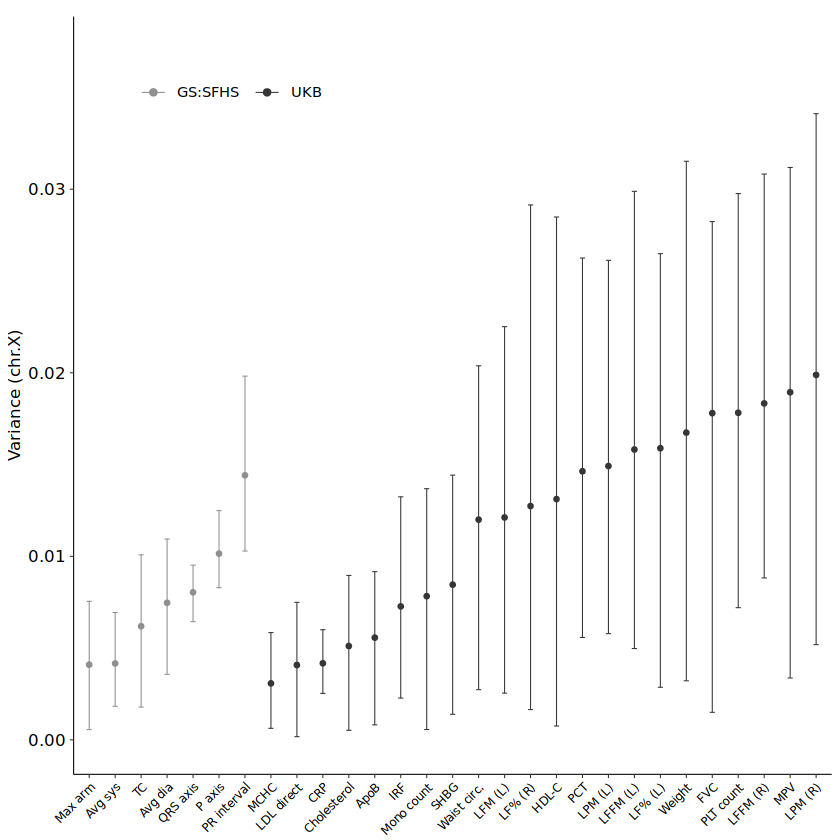

In [42]:
# 플롯 생성
p <- ggplot(df_plot, aes(x = phenotype, y = Vx)) +
    # 에러바 추가
    geom_errorbar(
        aes(
            ymin = lower_Vx,
            ymax = upper_Vx,
            color = cohort
        ),
        width = 0.2,
        size = 0.3
    ) +
    # 포인트 추가
    geom_point(
        aes(color = cohort, fill = cohort),
        size = 1.5,
        shape = 21,
        stroke = 0.3
    ) +
    # Nature 스타일 색상
    scale_color_manual(
        values = c(
            "UKB" = "#363636",   
            "GS:SFHS" = "#8F8F8F"   
        )
    ) +
    scale_fill_manual(
        values = c(
            "UKB" = "#363636",
            "GS:SFHS" = "#8F8F8F"
        )
    ) +
    # 축 레이블
    labs(
        x = element_blank(),
        y = "Variance (chr.X)",
        color = "cohort",
        fill = "cohort"
    ) +
    # 기존 Nature 테마 적용
    get_nature_theme() +
    # x축 레이블 회전
    theme(
        axis.text.x = element_text(
            angle = 45,
            hjust = 1,
            vjust = 1,
            size = 6
        ),
        legend.margin = margin(1, 1, 1, 1, unit = "mm"),
        legend.position = c(0.2, 0.9),  # 왼쪽 위 위치 지정
        legend.title = element_blank(),  # 타이틀 제거
        # legend.background = element_rect(fill = "transparent"), # 배경 투명하게
        # legend.box.background = element_rect(fill = "transparent"),
        
        # legend.position = "top",
        legend.box = "vertical",
        plot.margin = margin(b = 2, l = 5, r = 5, t = 10),
        legend.direction = "horizontal",  # 가로로 배치
        # legend.columns = 2  # 2열로 배치
    ) +
    guides(
        color = guide_legend(
            override.aes = list(size = 2)  # 범례 도형 크기 최소화
        )
    ) + 
    # y축 범위 설정
    scale_y_continuous(
        limits = c(0, max(df_plot$upper_Vx) * 1.1),
        breaks = scales::pretty_breaks()
    ) + 
    theme(
        axis.text.x = element_text(size = 7),  # x축 텍스트 크기 조정
        axis.text.y = element_text(size = 10),  # y축 텍스트 크기 조정
        axis.title.x = element_blank(),  # x축 레이블을 blank로 설정
        axis.title.y = element_text(size = 10)  # y축 레이블 크기 조정
    ) 

# 플롯 출력
print(p)

In [45]:
ggsave(
    filename = "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/X.prediction.pdf",
    plot = p,
    width = 125,
    height = 50,
    units = "mm",
    dpi = 300
)